In [4]:
import numpy as np
import matplotlib.pyplot as plt
from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed, select_dimension
import seaborn as sns
import warnings
from graspy.simulations import binary_sbm, rdpg_from_latent
from graspy.utils import symmetrize
import time
import pandas as pd


warnings.filterwarnings("ignore")
FONTSIZE = 30

def double_plot(A, X):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    sns.heatmap(A, ax=ax[0], xticklabels=False,
                yticklabels=False, cbar=False, cmap='Blues')
    sns.scatterplot(X[:,1], X[:,2], ax=ax[1],alpha = 0.5,s=100)
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    ax[0].set_title('Adjacency matrix', fontsize=FONTSIZE)
    ax[1].set_title('Adjacency spectral embedding',
                    fontsize=FONTSIZE)
    return ax

def adj_plot(A, title=None):
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    sns.heatmap(A, ax=ax, xticklabels=False, yticklabels=False,
                cbar=False, cmap='Blues')
    if title is None: 
        title = 'Adjacency matrix'
    ax.set_title(title, fontsize=FONTSIZE)
    return ax

def get_block_probs(eps):
    B = np.array([[0.5+eps, 0.2],
                  [0.2, 0.5+eps]])
    return B


# Working on Table 1 

Epsilon = 0
Epsilon = 0.05
Epsilon = 0.1
Epsilon = 0.2


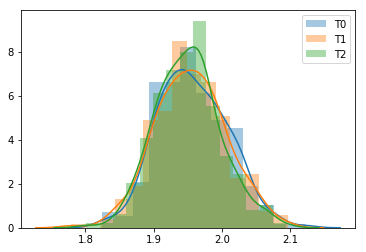

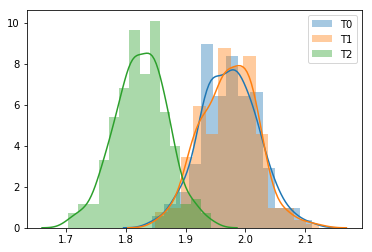

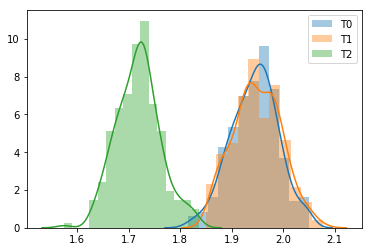

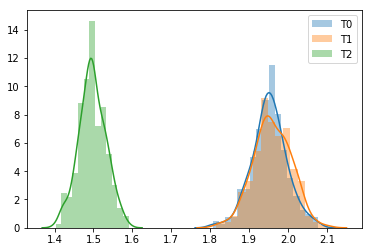

In [11]:
n_components = 2
n_bootstraps = 250
sizes = [250,250]
Bx = get_block_probs(0)
epsilons = [0, 0.05, 0.1, 0.2]
T0 = []
T1 = []
T2 = []
spt = SemiparametricTest(n_components=n_components,
                         n_bootstraps=n_bootstraps)
for eps in epsilons:
    print('Epsilon = {}'.format(eps))
    By = get_block_probs(eps)
    A0 = binary_sbm(sizes,Bx)
    A1 = binary_sbm(sizes,Bx)
    A2 = binary_sbm(sizes,By)
    Xhat0 = AdjacencySpectralEmbed(k=n_components).fit_transform(A0)
    Xhat1 = AdjacencySpectralEmbed(k=n_components).fit_transform(A1)
    Xhat2 = AdjacencySpectralEmbed(k=n_components).fit_transform(A2)
    T0.append(spt._bootstrap(Xhat0))
    T1.append(spt._bootstrap(Xhat1))
    T2.append(spt._bootstrap(Xhat2))
    
for i in range(len(epsilons)):
    sns.distplot(T0[i], label='T0')
    sns.distplot(T1[i], label='T1')
    sns.distplot(T2[i], label='T2')
    plt.legend()
    plt.show()

Epsilon = 0
Epsilon = 0.05
Epsilon = 0.1
Epsilon = 0.2


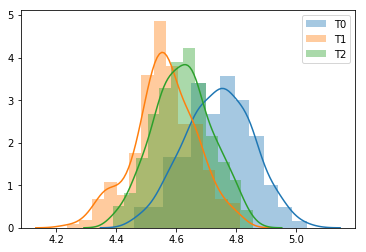

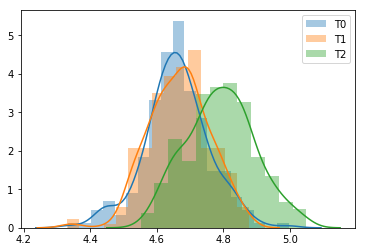

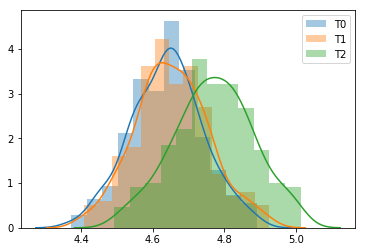

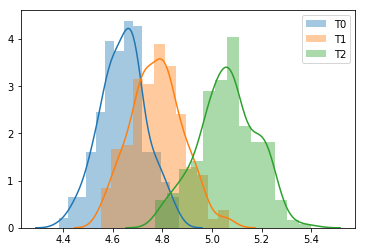

In [12]:
n_components = 4
n_bootstraps = 250
sizes = [250,250]
Bx = get_block_probs(0)
epsilons = [0, 0.05, 0.1, 0.2]
T0 = []
T1 = []
T2 = []
spt = SemiparametricTest(n_components=n_components,
                         n_bootstraps=n_bootstraps)
for eps in epsilons:
    print('Epsilon = {}'.format(eps))
    By = get_block_probs(eps)
    A0 = binary_sbm(sizes,Bx)
    A1 = binary_sbm(sizes,Bx)
    A2 = binary_sbm(sizes,By)
    Xhat0 = AdjacencySpectralEmbed(k=n_components).fit_transform(A0)
    Xhat1 = AdjacencySpectralEmbed(k=n_components).fit_transform(A1)
    Xhat2 = AdjacencySpectralEmbed(k=n_components).fit_transform(A2)
    T0.append(spt._bootstrap(Xhat0))
    T1.append(spt._bootstrap(Xhat1))
    T2.append(spt._bootstrap(Xhat2))
    
for i in range(len(epsilons)):
    sns.distplot(T0[i], label='T0')
    sns.distplot(T1[i], label='T1')
    sns.distplot(T2[i], label='T2')
    plt.legend()
    plt.show()

Epsilon = 0
Epsilon = 0.05
Epsilon = 0.1
Epsilon = 0.2


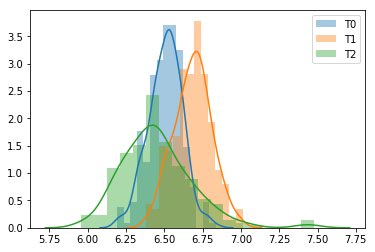

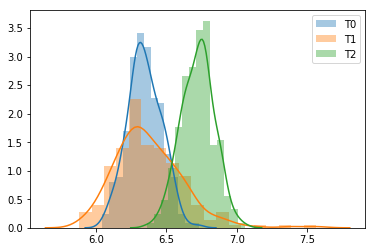

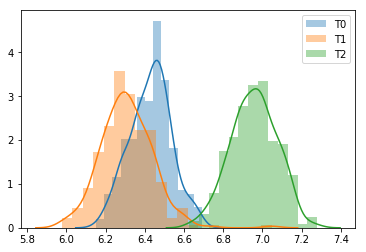

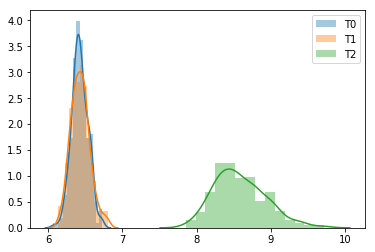

In [13]:
n_components = 6
n_bootstraps = 250
sizes = [250,250]
Bx = get_block_probs(0)
epsilons = [0, 0.05, 0.1, 0.2]
T0 = []
T1 = []
T2 = []
spt = SemiparametricTest(n_components=n_components,
                         n_bootstraps=n_bootstraps)
for eps in epsilons:
    print('Epsilon = {}'.format(eps))
    By = get_block_probs(eps)
    A0 = binary_sbm(sizes,Bx)
    A1 = binary_sbm(sizes,Bx)
    A2 = binary_sbm(sizes,By)
    Xhat0 = AdjacencySpectralEmbed(k=n_components).fit_transform(A0)
    Xhat1 = AdjacencySpectralEmbed(k=n_components).fit_transform(A1)
    Xhat2 = AdjacencySpectralEmbed(k=n_components).fit_transform(A2)
    T0.append(spt._bootstrap(Xhat0))
    T1.append(spt._bootstrap(Xhat1))
    T2.append(spt._bootstrap(Xhat2))
    
for i in range(len(epsilons)):
    sns.distplot(T0[i], label='T0')
    sns.distplot(T1[i], label='T1')
    sns.distplot(T2[i], label='T2')
    plt.legend()
    plt.show()

In [14]:
# Green is distribution of T statistic under an alternative
# Need to find the ammount of green that is greater than at least 95 percent
# of the orange or blue distributions 
# The test will actually reject with the distribution that is 

In [16]:
n_components = 6
n_bootstraps = 200
num_sims = 10
sizes = [200,200]
Bx = get_block_probs(0)
epsilons = [0, 0.05, 0.1, 0.2]
p_nulls = []
p_alts = []
test_nulls = []
test_alts = []
t = time.process_time()
for eps in epsilons:
    print('Epsilon = {}'.format(eps))
    By = get_block_probs(eps)
    for sim in range(num_sims):
        A0 = binary_sbm(sizes,Bx)
        A1 = binary_sbm(sizes,Bx)
        A2 = binary_sbm(sizes,By)
        spt_null = SemiparametricTest(n_components=n_components, 
                                      n_bootstraps=n_bootstraps)
        spt_alt = SemiparametricTest(n_components=n_components, 
                                      n_bootstraps=n_bootstraps)
        spt_null.fit(A0, A1)
        spt_alt.fit(A0, A2)
        p_nulls.append(spt_null.p)
        p_alts.append(spt_alt.p)
        test_nulls.append(spt_null)
        test_alts.append(spt_alt)
        if sim % 25 == 0:
            print(sim)
print('{0:.3f} mins'.format(((time.process_time() - t)/60)))


Epsilon = 0
0
Epsilon = 0.05
0
Epsilon = 0.1
0
Epsilon = 0.2
0
38.990 mins


In [23]:
n_components = 6
n_bootstraps = 250
num_sims = 250
sizes = [250,250]
Bx = get_block_probs(0)
epsilons = [0, 0.05, 0.1, 0.2]
spt = SemiparametricTest(n_components=n_components,
                         n_bootstraps=n_bootstraps)
diffs_null = np.zeros((len(epsilons), num_sims))
diffs_alt = np.zeros((len(epsilons), num_sims))
t = time.process_time()
for e_idx, eps in enumerate(epsilons):
    print('Epsilon = {}'.format(eps))
    for s_idx in range(num_sims):
        By = get_block_probs(eps)
        A0 = binary_sbm(sizes,Bx)
        A1 = binary_sbm(sizes,Bx)
        A2 = binary_sbm(sizes,By)
        Xhat0 = AdjacencySpectralEmbed(k=n_components).fit_transform(A0)
        Xhat1 = AdjacencySpectralEmbed(k=n_components).fit_transform(A1)
        Xhat2 = AdjacencySpectralEmbed(k=n_components).fit_transform(A2)
        diffs_null[e_idx, s_idx] = spt._difference_norm(Xhat0, Xhat1)
        diffs_alt[e_idx, s_idx] = spt._difference_norm(Xhat0, Xhat2)
print('{0:.3f} mins'.format(((time.process_time() - t)/60)))

    
# for i in range(len(epsilons)):
#     sns.distplot(T0[i], label='T0')
#     sns.distplot(T1[i], label='T1')
#     sns.distplot(T2[i], label='T2')
#     plt.legend()
#     plt.show()

Epsilon = 0
Epsilon = 0.05
Epsilon = 0.1
Epsilon = 0.2
4.431 mins


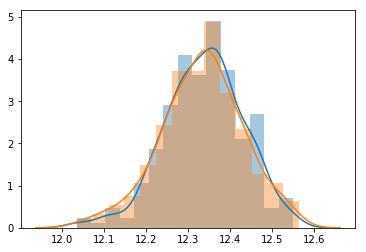

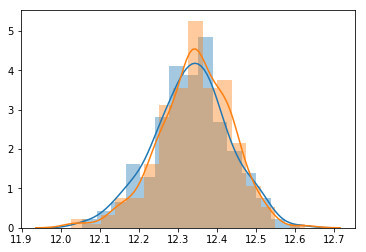

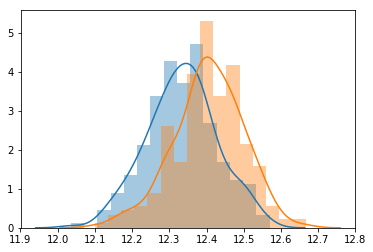

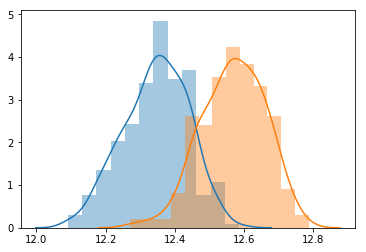

In [24]:
for e_idx in range(len(epsilons)):
    sns.distplot(diffs_null[e_idx,:])
    sns.distplot(diffs_alt[e_idx,:])
    plt.show()